In [1]:
"""Import necessary packages"""
"""NOTE: I've used seaborn visualization package - Please use Pip Install seaborn
to install the package from your commandline and then proceed or feel free to comment out seaborn
related code. All others should work fine. """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
"""Load dataset into dataframe"""
iris_df = pd.read_csv('Iris_Data.csv', na_values=['NA'])
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels,Unnamed: 5,Unnamed: 6
0,5.1,3.5,1.4,0.2,0,NaN,NaN
1,4.9,3.0,1.4,0.2,0,NaN,NaN
2,4.7,3.2,1.3,0.2,0,NaN,NaN
3,4.6,3.1,1.5,0.2,0,NaN,NaN
4,5.0,3.6,1.4,0.2,0,NaN,NaN


In [3]:
"""Looking at some basic descriptive stats"""
iris_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels,Unnamed: 5,Unnamed: 6
count,150.000000,150.000000,150.000000,150.000000,150.000000,0,0
mean,5.843333,3.054000,3.758667,1.198667,1.000000,NaN,NaN
std,0.828066,0.433594,1.764420,0.763161,0.819232,NaN,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN,NaN
max,7.900000,4.400000,6.900000,2.500000,2.000000,NaN,NaN


From the above descriptive table - we can notice that there's no missing data for any of the flower's features and we do have labels pre-classified for the entire dataset which is good. But we do have two unnamed NULL columns which is of no use so we'll have to drop them before we proceed.

In [4]:
"""Drop the NULL columns"""
iris_df.drop(iris_df.columns[[5,6]], axis=1, inplace=True)

Scatterplot matrices are one of the important visualization tools that basically plots the distribution of each column along the diagonal, and then plots a scatterplot matrix for the combination of each variable. 

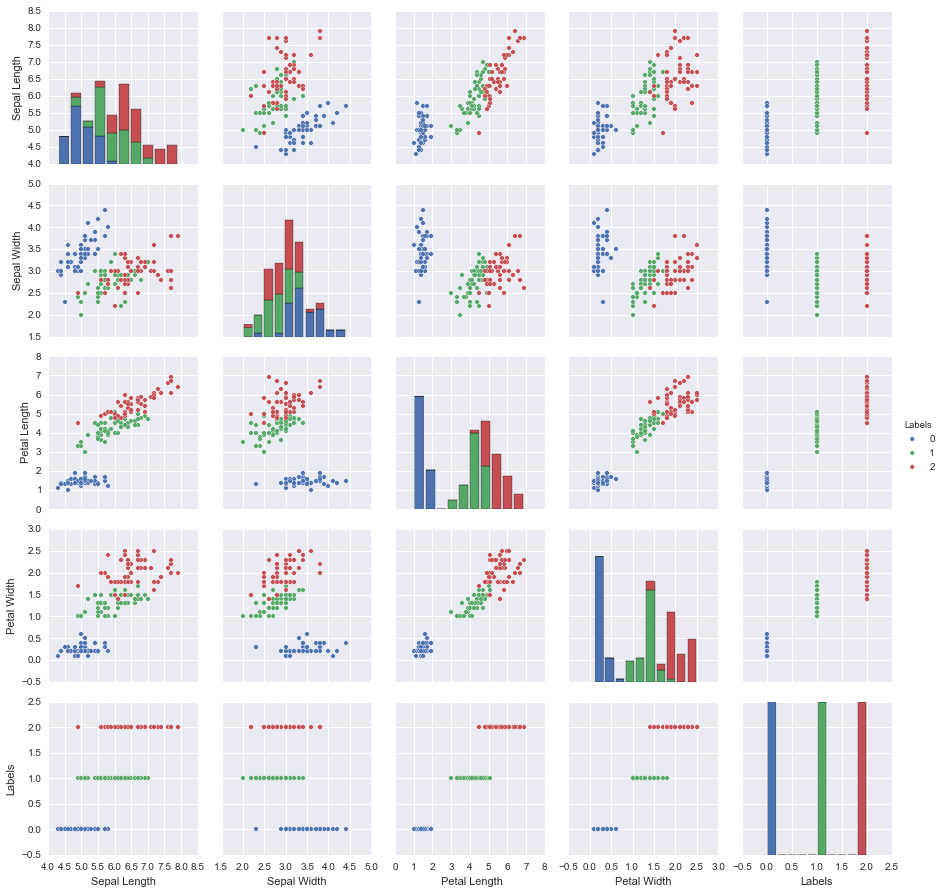

In [5]:
"""Generate a scatterplot matrix"""
sns.pairplot(iris_df, hue='Labels')

By looking at the image above, its evident that class 0 should be a little easy to identify when compared to the other two. Also, classes 1 and 2 are somewhat closely related and do share some common features. 

Another important thing to notice, There seems to be one clear outlier value in the Sepal Width column for the class 0 and in the Sepal Length column for class 2. Let's do a histogram plot to know better.

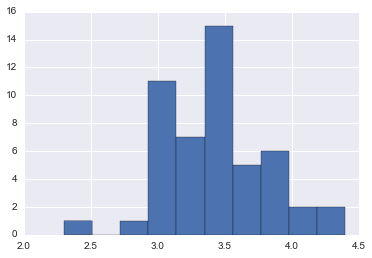

In [6]:
iris_df.loc[iris_df['Labels'] == 0, 'Sepal Width'].hist()

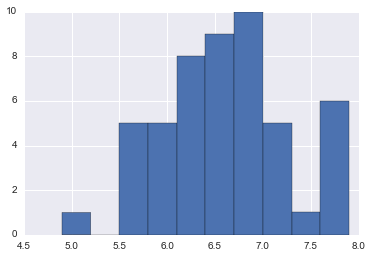

In [7]:
iris_df.loc[iris_df['Labels'] == 2, 'Sepal Length'].hist()

At this point, after looking at the histogram it makes sense to drop any Sepal Width value less than 2.5 (to preserve data quality and improve our model's prediction) and also drop any Sepal Length value less than 5.5 as they seem to be recorded because of measurement error. 

In [8]:
iris_df = iris_df.loc[(iris_df['Labels'] != 0) | (iris_df['Sepal Width'] >= 2.5)]
iris_df = iris_df.loc[(iris_df['Labels'] != 2) | (iris_df['Sepal Length'] >= 5.5)]

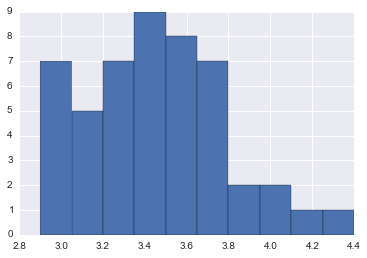

In [9]:
"""Plot histogram to confirm the changes has had its effect"""
iris_df.loc[iris_df['Labels'] == 0, 'Sepal Width'].hist()

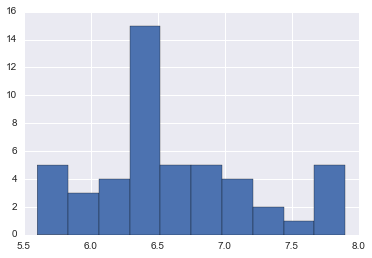

In [10]:
iris_df.loc[iris_df['Labels'] == 2, 'Sepal Length'].hist()

Now we are done doing some basic data visualization and data cleaning procees. Its time to build our model !!!

In [11]:
"""Store features and class labels in separate variables"""
#As a precautionary let's filter out whitespaces that may have creeped in somehow into our dataframe headers. Pfft!!

iris_df = iris_df.rename(columns=lambda x: x.strip())
features = iris_df[['Sepal Length', 'Sepal Width','Petal Length', 'Petal Width']].values
classes = iris_df['Labels'].values
print features[:5]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [12]:
"""Create train and test data splits for both normal and standardized data points"""
X_train, X_test, y_train, y_test = train_test_split(features,classes,
                                                    test_size=0.30,random_state=45)

#Decision Tree:

A decision tree is the minimum number of yes/no questions that one has to ask, to assess the probability of making a correct decision, most of the time. Let's build a decision tree classifier now. 

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=45)

#First we train our classifier on our training set.
dt_classifier.fit(X_train, y_train)

#Test our classifier on unknown sample of data called the test set.
print "Prediction score: "+str(dt_classifier.score(X_test, y_test))

Prediction score: 0.955555555556


I was able to achieve 95.5 % classification accuracy using decision tree classification model. But this is just on one sample of our training and test split. In-order to truly understand the potential of our model we may want to repeat the above process many times to judge the performance of our model.

In [14]:
"""This function attempts to test our decision tree classifier's performance on different samples of train and test sets
while looping over an iteration of 1000 times."""
def try_different_samples():
    model_performance = []
    for repetition in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(features,classes,
                                                    test_size=0.30)
        dt_classifier = DecisionTreeClassifier()
        dt_classifier.fit(X_train, y_train)
        accuracy = dt_classifier.score(X_test, y_test)
        model_performance.append(accuracy)
    return model_performance

In [15]:
Acc = try_different_samples()
print "Average classification accuracy after 1000 iterations: "+str(np.mean(Acc))

Average classification accuracy after 1000 iterations: 0.953977777778


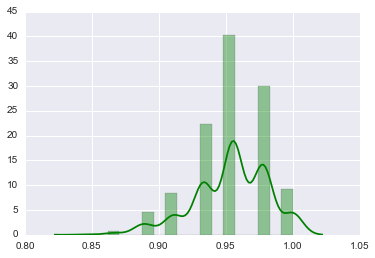

In [16]:
"""Lets plot the accuracies to see its distribution"""
sns.distplot(Acc,color = 'green')

To better validate the performance of our model and also to make sure that our model doesn't overfit (perfoms too good on known samples of data and fails to classify unknown samples). In general, we can use K-fold cross validation measure which basically splits the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set and then this process is repeated k times such that each subset is used as the testing set exactly once. By doing so we can rightfully gain confidence on our model.

We will use 10-Fold cross validation below to see the model's performance.

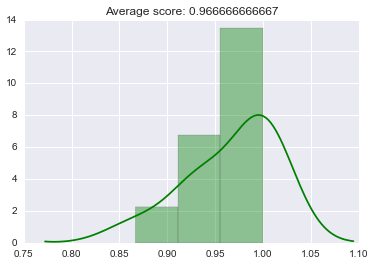

In [17]:
dt_classifier = DecisionTreeClassifier(random_state=45)

cv_scores = cross_val_score(dt_classifier,iris_df.drop('Labels',axis=1), iris_df['Labels'], cv=10)
sns.distplot(cv_scores, color='green')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

The above graphs look far better and consistent when compared to our previous iterative approach (1000 times). The average classification has also improved by 1.3 %.

Finally, We can also use gridsearch alongside cross-validation to tune the parameters of our Decision Tree and also to find best parameter setting that would improve our overall classification accuracy.

Every machine learning model comes with a set of hyper-parameters that we could alter/tweak to figure out the best perfoming model. Here we make use of the GridSearchCV which is a scikit-learn provides object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score.

Refer: http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

In [18]:
"""GridSearch parameter estimation"""
dt_classifier = DecisionTreeClassifier(random_state=45)

tune_parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

cross_validation = StratifiedKFold(classes, n_folds=10)

grid_search = GridSearchCV(dt_classifier,
                           param_grid=tune_parameters,
                           cv=cross_validation)

grid_search.fit(features, classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.966216216216
Best parameters: {'min_samples_split': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}


The gridsearch optimization technique has suggested us that, It's possible to achieve a maximum of 96.6 % of classification accuracy using our decision tree classifier while using the best parameters as listed above. Now that's almost the same accuracy as the 10-fold cross validation. 

while all the above points may sound good but a common problem that decision trees face is that they're prone to overfitting: They almost classify the training set near-perfectly, but fail to generalize to data they have not seen before.

#KNearest Neighbours:

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [20]:
print "Confusion matrix for n_neighbors=1 prediction: \n"
print(confusion_matrix(y_test,pred))

Confusion matrix for n_neighbors=1 prediction: 

[[16  0  0]
 [ 0 11  1]
 [ 0  0 17]]


In [21]:
print "Classification report for n_neighbors=1 prediction: \n"
print(classification_report(y_test,pred))

Classification report for n_neighbors=1 prediction: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.92      0.96        12
          2       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        45



In [22]:
"""Let's test our knn classifier by tweaking its neighbor counts:"""
error_rate = []
for i in [10,20,50,80]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

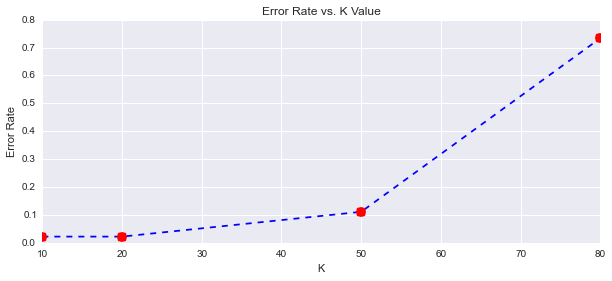

In [23]:
plt.figure(figsize=(10,4))
plt.plot([10,20,50,80],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Basically in KNN model, what we do is that we try to find the k nearest neighbors of a data point and do a majority class voting to therefore predict the test data point class. Now when the size of the dataset is relatively small and if the K value is large (in our case if we assume k=50 then then that's 50% of our training set that has 105 data points), the algorithm faces a lot of confusion while making its decision based of the majority voting and hence is prone to make wrong classifications leading to increase in error rate. The same applies for k=80. Now this might work well if our training dataset is quite large with thousands of data points.  

#Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=300,max_features = 'auto',random_state = 42)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [25]:
print "Confusion matrix: \n"
print(confusion_matrix(y_test,predictions))

Confusion matrix: 

[[16  0  0]
 [ 0 11  1]
 [ 0  0 17]]


In [26]:
print "Classification report: \n"
print(classification_report(y_test,predictions))

Classification report: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.92      0.96        12
          2       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        45



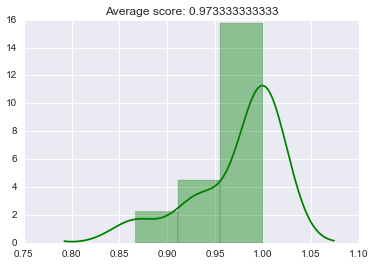

In [28]:
#n_estimators -> total no. of trees to be built before making a prediction
rfc = RandomForestClassifier(n_estimators=300,max_features = 'auto',random_state=42) 

cv_scores = cross_val_score(rfc,iris_df.drop('Labels',axis=1), iris_df['Labels'], cv=10)
sns.distplot(cv_scores, color='green')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#Conclusion:

From my understanding and experience and from the graph above, Random Forest almost always performs better than decision trees. The average cross validation score accounts for it with 97.3% accuracy. This is because the trees are more independent of each other compared to regular decision trees. It works by generating multiple classifiers/models which learn and make predictions independently. Those predictions are then combined into a single (mega) prediction that should be as good or better than the prediction made by any one classifer. which often results in better predictive performance. That being said, it’s also faster than bagging, because each tree learns only from a subset of features.